# Downloading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!wget --keep-session-cookies --save-cookies=cookies.txt --post-data 'username=pooria_b&password=119@266113Pooria&submit=Login' https://www.cityscapes-dataset.com/login/
!wget --load-cookies cookies.txt --content-disposition https://www.cityscapes-dataset.com/file-handling/?packageID=1

--2022-06-21 13:54:07--  https://www.cityscapes-dataset.com/login/
Resolving www.cityscapes-dataset.com (www.cityscapes-dataset.com)... 139.19.217.8
Connecting to www.cityscapes-dataset.com (www.cityscapes-dataset.com)|139.19.217.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.cityscapes-dataset.com/downloads/ [following]
--2022-06-21 13:54:08--  https://www.cityscapes-dataset.com/downloads/
Reusing existing connection to www.cityscapes-dataset.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘index.html’

index.html              [ <=>                ]  47.35K   296KB/s    in 0.2s    

2022-06-21 13:54:08 (296 KB/s) - ‘index.html’ saved [48483]

--2022-06-21 13:54:09--  https://www.cityscapes-dataset.com/file-handling/?packageID=1
Resolving www.cityscapes-dataset.com (www.cityscapes-dataset.com)... 139.19.217.8
Connecting to www.cityscapes-dataset.com (www.cityscapes-dataset.com)|139.19.217.8

In [ ]:
!wget --keep-session-cookies --save-cookies=cookies.txt --post-data 'username=pooria_b&password=119@266113Pooria&submit=Login' https://www.cityscapes-dataset.com/login/
!wget --load-cookies cookies.txt --content-disposition https://www.cityscapes-dataset.com/file-handling/?packageID=3

--2022-06-21 13:54:22--  https://www.cityscapes-dataset.com/login/
Resolving www.cityscapes-dataset.com (www.cityscapes-dataset.com)... 139.19.217.8
Connecting to www.cityscapes-dataset.com (www.cityscapes-dataset.com)|139.19.217.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.cityscapes-dataset.com/downloads/ [following]
--2022-06-21 13:54:23--  https://www.cityscapes-dataset.com/downloads/
Reusing existing connection to www.cityscapes-dataset.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘index.html.1’

index.html.1            [ <=>                ]  47.35K   307KB/s    in 0.2s    

2022-06-21 13:54:23 (307 KB/s) - ‘index.html.1’ saved [48483]

--2022-06-21 13:54:23--  https://www.cityscapes-dataset.com/file-handling/?packageID=3
Resolving www.cityscapes-dataset.com (www.cityscapes-dataset.com)... 139.19.217.8
Connecting to www.cityscapes-dataset.com (www.cityscapes-dataset.com)|139.19.2

In [ ]:
!unzip -xq "/content/gtFine_trainvaltest.zip"
!rm        "/content/gtFine_trainvaltest.zip"

In [ ]:
!unzip -xq "/content/leftImg8bit_trainvaltest.zip"
!rm        '/content/leftImg8bit_trainvaltest.zip'

replace README? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


# Preparing Downloaded Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import os
import cv2
import os
from shutil import copy, move

from tqdm.notebook import tqdm

In [ ]:
color_path      = '/content/gtFine/train/aachen/aachen_000002_000019_gtFine_color.png'
instanceID_path = '/content/gtFine/train/aachen/aachen_000002_000019_gtFine_instanceIds.png'
labelID_path    = '/content/gtFine/train/aachen/aachen_000002_000019_gtFine_labelIds.png'
jason_path      = '/content/gtFine/train/aachen/aachen_000002_000019_gtFine_polygons.json'

In [ ]:
(cv2.imread(labelID_path, 0)).shape

(1024, 2048)

Text(0.5, 1.0, 'label')

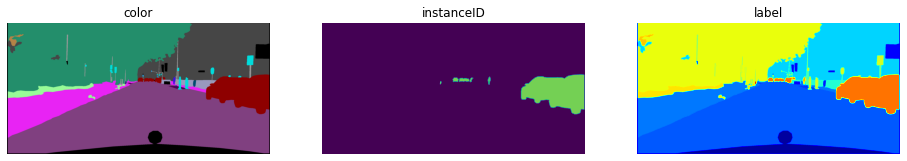

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (16,18))

ax[0].imshow(cv2.imread(color_path))
ax[0].axis('off')
ax[0].set_title('color')

ax[1].imshow(cv2.imread(instanceID_path, 0))
ax[1].axis('off')
ax[1].set_title('instanceID')

ax[2].imshow(cv2.imread(labelID_path, 0), cmap = 'jet')
ax[2].axis('off')
ax[2].set_title('label')

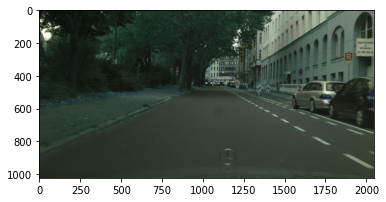

In [ ]:
left_img_path = '/content/leftImg8bit/train/aachen/aachen_000002_000019_leftImg8bit.png'
img = cv2.imread(left_img_path)
plt.imshow(img)

# Using Preprocessed Data From Drive

In [ ]:
mask_dataset = glob('/content/leftImg8bit/train/*/*.png')
print('Y train len', len(mask_dataset))

Y train len 2975


In [ ]:
image_dataset = glob('/content/gtFine/train/*/*labelIds.png')
print('X train len', len(image_dataset))

X train len 2975


In [ ]:
train_img_names = glob('/content/leftImg8bit/train/*/*.png')
train_img_names.sort()

val_img_names = glob('/content/leftImg8bit/val/*/*.png')
val_img_names.sort()

In [ ]:
print('total number of training image is   : ' , len(train_img_names))
print('total number of validation image is : ' , len(val_img_names))

total number of training image is   :  2975
total number of validation image is :  500


In [ ]:
# !rm -rf '/content/dataset_aug_format'

In [ ]:
train_images = '/content/dataset_aug_format/train_images/images'
train_masks  = '/content/dataset_aug_format/train_masks/masks'

val_images   = '/content/dataset_aug_format/val_images/images'
val_masks    = '/content/dataset_aug_format/val_masks/masks' 

os.makedirs(train_images, exist_ok = True)
os.makedirs(train_masks, exist_ok = True)

os.makedirs(val_images, exist_ok = True)
os.makedirs(val_masks, exist_ok = True)

In [ ]:
old_imgs_path_train = glob('/content/leftImg8bit/train/*/*.png')
old_imgs_path_train.sort()
for img_path in tqdm(old_imgs_path_train):
  copy(img_path, train_images)

old_imgs_path_val = glob('/content/leftImg8bit/val/*/*.png')
old_imgs_path_val.sort()
for img_path in tqdm(old_imgs_path_val):
  copy(img_path, val_images)

  0%|          | 0/2975 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
old_masks_path_train = glob('/content/gtFine/train/*/*_labelIds.png')
old_masks_path_train.sort()
for img_path in tqdm(old_masks_path_train):
  copy(img_path, train_masks)

old_masks_path_val = glob('/content/gtFine/val/*/*_labelIds.png')
old_masks_path_val.sort()
for img_path in tqdm(old_masks_path_val):
  copy(img_path, val_masks)

  0%|          | 0/2975 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
train_img_names = glob('/content/dataset_aug_format/train_images/*/*.png')
train_msk_names = glob('/content/dataset_aug_format/train_masks/*/*.png')

val_img_names = glob('/content/dataset_aug_format/val_images/*/*.png')
val_msk_names = glob('/content/dataset_aug_format/val_masks/*/*.png')

In [ ]:
print('total number of training image is : ' , len(train_img_names))
print('total number of training mask is  : ' , len(train_msk_names))

print('total number of val image is      : ' , len(val_img_names))
print('total number of val mask is       : ' , len(val_msk_names))

total number of training image is :  2975
total number of training mask is  :  2975
total number of val image is      :  500
total number of val mask is       :  500


In [ ]:
img_dir = glob('/content/dataset_aug_format/train_images/*/*.png')
img_dir.sort()

msk_dir = glob('/content/dataset_aug_format/train_masks/*/*.png')
msk_dir.sort()

In [ ]:
img_dir[:5]

['/content/dataset_aug_format/train_images/images/aachen_000000_000019_leftImg8bit.png',
 '/content/dataset_aug_format/train_images/images/aachen_000001_000019_leftImg8bit.png',
 '/content/dataset_aug_format/train_images/images/aachen_000002_000019_leftImg8bit.png',
 '/content/dataset_aug_format/train_images/images/aachen_000003_000019_leftImg8bit.png',
 '/content/dataset_aug_format/train_images/images/aachen_000004_000019_leftImg8bit.png']

In [ ]:
img_dir[0]

'/content/dataset_aug_format/train_images/images/aachen_000000_000019_leftImg8bit.png'

In [ ]:
msk_dir[0]

'/content/dataset_aug_format/train_masks/masks/aachen_000000_000019_gtFine_labelIds.png'

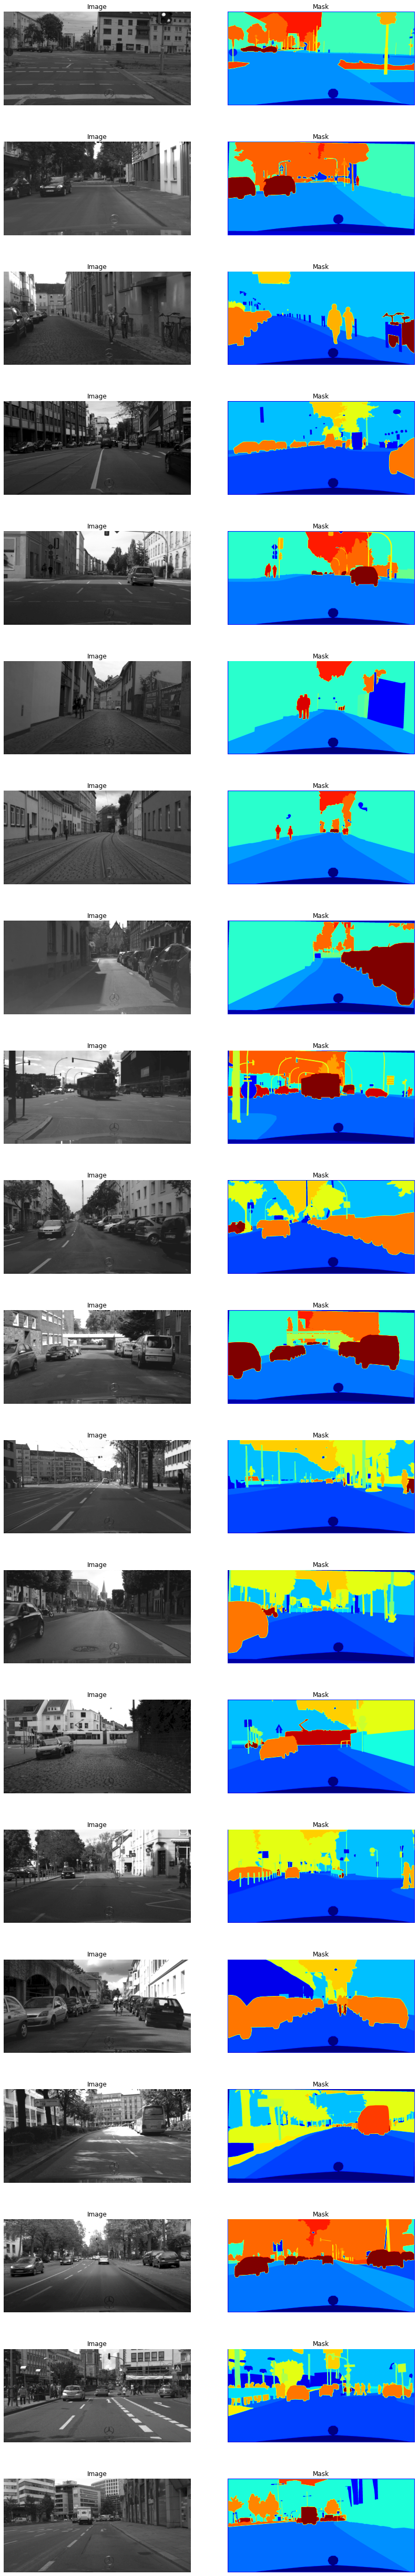

In [ ]:
from IPython.core.pylabtools import figsize
import random

num_images = 20
test_img_numbers = np.random.randint(0, len(img_dir)-1, num_images)

imgs_for_plot    = [cv2.imread(img_dir[image_number], 0) for image_number in test_img_numbers]
masks_for_plot   = [cv2.imread(msk_dir[image_number], 0) for image_number in test_img_numbers]

nrows = num_images
ncols = 2

fig, ax = plt.subplots(nrows = nrows , ncols = ncols ,figsize=(14 ,90))

for i in range(nrows):
  ax[i][0].imshow(imgs_for_plot[i], cmap= 'gray')
  ax[i][0].axis('off')
  ax[i][0].set_title('Image')

  ax[i][1].imshow(masks_for_plot[i], cmap='jet')
  ax[i][1].axis('off')
  ax[i][1].set_title('Mask')

In [ ]:
!rm -rf '/content/gtFine'
!rm -rf '/content/leftImg8bit'

# DANet Architecture

In [ ]:
from keras.layers import Activation, Conv2D
import keras.backend as K
import tensorflow as tf
from keras.layers import Layer


class PAM(Layer):
    def __init__(self,
                 gamma_initializer=tf.zeros_initializer(),
                 gamma_regularizer=None,
                 gamma_constraint=None,
                 **kwargs):
        super(PAM, self).__init__(**kwargs)
        self.gamma_initializer = gamma_initializer
        self.gamma_regularizer = gamma_regularizer
        self.gamma_constraint = gamma_constraint
        self.b_conv = Conv2D(512 // 8, 1, use_bias=False, kernel_initializer='he_normal')
        self.c_conv = Conv2D(512 // 8, 1, use_bias=False, kernel_initializer='he_normal')
        self.d_conv = Conv2D(512, 1, use_bias=False, kernel_initializer='he_normal')
    def build(self, input_shape):
        self.gamma = self.add_weight(shape=(1, ),
                                     initializer=self.gamma_initializer,
                                     name='gamma',
                                     regularizer=self.gamma_regularizer,
                                     constraint=self.gamma_constraint)

        self.built = True

    def compute_output_shape(self, input_shape):
        return input_shape

    def call(self, input):
        input_shape = input.get_shape().as_list()
        _, h, w, filters = input_shape
      
        b = self.b_conv(input)
        c = self.c_conv(input)
        d = self.d_conv(input)

        vec_b = K.reshape(b, (-1, h * w, filters // 8))
        vec_cT = tf.transpose(K.reshape(c, (-1, h * w, filters // 8)), (0, 2, 1))
        bcT = K.batch_dot(vec_b, vec_cT)
        softmax_bcT = Activation('softmax')(bcT)
        vec_d = K.reshape(d, (-1, h * w, filters))
        bcTd = K.batch_dot(softmax_bcT, vec_d)
        bcTd = K.reshape(bcTd, (-1, h, w, filters))

        out = self.gamma*bcTd + input
        return out


class CAM(Layer):
    def __init__(self,
                 gamma_initializer=tf.zeros_initializer(),
                 gamma_regularizer=None,
                 gamma_constraint=None,
                 **kwargs):
        super(CAM, self).__init__(**kwargs)
        self.gamma_initializer = gamma_initializer
        self.gamma_regularizer = gamma_regularizer
        self.gamma_constraint = gamma_constraint

    def build(self, input_shape):
        self.gamma = self.add_weight(shape=(1, ),
                                     initializer=self.gamma_initializer,
                                     name='gamma',
                                     regularizer=self.gamma_regularizer,
                                     constraint=self.gamma_constraint)

        self.built = True

    def compute_output_shape(self, input_shape):
        return input_shape

    def call(self, input):
        input_shape = input.get_shape().as_list()
        _, h, w, filters = input_shape

        vec_a = K.reshape(input, (-1, h * w, filters))
        vec_aT = tf.transpose(vec_a, (0, 2, 1))
        aTa = K.batch_dot(vec_aT, vec_a)
        softmax_aTa = Activation('softmax')(aTa)
        aaTa = K.batch_dot(vec_a, softmax_aTa)
        aaTa = K.reshape(aaTa, (-1, h, w, filters))

        out = self.gamma*aaTa + input
        return out

In [ ]:
from keras.models import Model
from keras.layers import Input, Activation, Conv2D, Dropout
from keras.layers import MaxPooling2D, BatchNormalization
from keras.layers import UpSampling2D
from keras.layers import concatenate
from keras.layers import add

def conv3x3(x, out_filters, strides=(1, 1)):
    x = Conv2D(out_filters, 3, padding='same', strides=strides, use_bias=False, kernel_initializer='he_normal')(x)
    return x


def Conv2d_BN(x, nb_filter, kernel_size, strides=(1, 1), padding='same', use_activation=True):
    x = Conv2D(nb_filter, kernel_size, padding=padding, strides=strides, kernel_initializer='he_normal')(x)
    x = BatchNormalization(axis=3)(x)
    if use_activation:
        x = Activation('relu')(x)
        return x
    else:
        return x


def basic_Block(input, out_filters, strides=(1, 1), with_conv_shortcut=False):
    x = conv3x3(input, out_filters, strides)
    x = BatchNormalization(axis=3)(x)
    x = Activation('relu')(x)

    x = conv3x3(x, out_filters)
    x = BatchNormalization(axis=3)(x)

    if with_conv_shortcut:
        residual = Conv2D(out_filters, 1, strides=strides, use_bias=False, kernel_initializer='he_normal')(input)
        residual = BatchNormalization(axis=3)(residual)
        x = add([x, residual])
    else:
        x = add([x, input])

    x = Activation('relu')(x)
    return x


def bottleneck_Block(input, out_filters, strides=(1, 1), dilation=(1, 1), with_conv_shortcut=False):
    expansion = 4
    de_filters = int(out_filters / expansion)

    x = Conv2D(de_filters, 1, use_bias=False, kernel_initializer='he_normal')(input)
    x = BatchNormalization(axis=3)(x)
    x = Activation('relu')(x)

    x = Conv2D(de_filters, 3, strides=strides, padding='same',
               dilation_rate=dilation, use_bias=False, kernel_initializer='he_normal')(x)
    x = BatchNormalization(axis=3)(x)
    x = Activation('relu')(x)

    x = Conv2D(out_filters, 1, use_bias=False, kernel_initializer='he_normal')(x)
    x = BatchNormalization(axis=3)(x)

    if with_conv_shortcut:
        residual = Conv2D(out_filters, 1, strides=strides, use_bias=False, kernel_initializer='he_normal')(input)
        residual = BatchNormalization(axis=3)(residual)
        x = add([x, residual])
    else:
        x = add([x, input])

    x = Activation('relu')(x)
    return x

def danet_resnet101(height, width, channel, classes):
    input = Input(shape=(height, width, channel))

    conv1_1 = Conv2D(64, 7, strides=(2, 2), padding='same', use_bias=False, kernel_initializer='he_normal')(input)
    conv1_1 = BatchNormalization(axis=3)(conv1_1)
    conv1_1 = Activation('relu')(conv1_1)
    conv1_2 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(conv1_1)

    # conv2_x  1/4
    conv2_1 = bottleneck_Block(conv1_2, 256, strides=(1, 1), with_conv_shortcut=True)
    conv2_2 = bottleneck_Block(conv2_1, 256)
    conv2_3 = bottleneck_Block(conv2_2, 256)

    # conv3_x  1/8
    conv3_1 = bottleneck_Block(conv2_3, 512, strides=(2, 2), with_conv_shortcut=True)
    conv3_2 = bottleneck_Block(conv3_1, 512)
    conv3_3 = bottleneck_Block(conv3_2, 512)
    conv3_4 = bottleneck_Block(conv3_3, 512)

    # conv4_x  1/16
    conv4_1 = bottleneck_Block(conv3_4, 1024, strides=(1, 1), dilation=(2, 2), with_conv_shortcut=True)
    conv4_2 = bottleneck_Block(conv4_1, 1024, dilation=(2, 2))
    conv4_3 = bottleneck_Block(conv4_2, 1024, dilation=(2, 2))
    conv4_4 = bottleneck_Block(conv4_3, 1024, dilation=(2, 2))
    conv4_5 = bottleneck_Block(conv4_4, 1024, dilation=(2, 2))
    conv4_6 = bottleneck_Block(conv4_5, 1024, dilation=(2, 2))
    conv4_7 = bottleneck_Block(conv4_6, 1024, dilation=(2, 2))
    conv4_8 = bottleneck_Block(conv4_7, 1024, dilation=(2, 2))
    conv4_9 = bottleneck_Block(conv4_8, 1024, dilation=(2, 2))
    conv4_10 = bottleneck_Block(conv4_9, 1024, dilation=(2, 2))
    conv4_11 = bottleneck_Block(conv4_10, 1024, dilation=(2, 2))
    conv4_12 = bottleneck_Block(conv4_11, 1024, dilation=(2, 2))
    conv4_13 = bottleneck_Block(conv4_12, 1024, dilation=(2, 2))
    conv4_14 = bottleneck_Block(conv4_13, 1024, dilation=(2, 2))
    conv4_15 = bottleneck_Block(conv4_14, 1024, dilation=(2, 2))
    conv4_16 = bottleneck_Block(conv4_15, 1024, dilation=(2, 2))
    conv4_17 = bottleneck_Block(conv4_16, 1024, dilation=(2, 2))
    conv4_18 = bottleneck_Block(conv4_17, 1024, dilation=(2, 2))
    conv4_19 = bottleneck_Block(conv4_18, 1024, dilation=(2, 2))
    conv4_20 = bottleneck_Block(conv4_19, 1024, dilation=(2, 2))
    conv4_21 = bottleneck_Block(conv4_20, 1024, dilation=(2, 2))
    conv4_22 = bottleneck_Block(conv4_21, 1024, dilation=(2, 2))
    conv4_23 = bottleneck_Block(conv4_22, 1024, dilation=(2, 2))

    # conv5_x  1/32
    conv5_1 = bottleneck_Block(conv4_23, 2048, strides=(1, 1), dilation=(4, 4), with_conv_shortcut=True)
    conv5_2 = bottleneck_Block(conv5_1, 2048, dilation=(4, 4))
    conv5_3 = bottleneck_Block(conv5_2, 2048, dilation=(4, 4))

    # ATTENTION
    reduce_conv5_3 = Conv2D(512, 3, padding='same', use_bias=False, kernel_initializer='he_normal')(conv5_3)
    reduce_conv5_3 = BatchNormalization(axis=3)(reduce_conv5_3)
    reduce_conv5_3 = Activation('relu')(reduce_conv5_3)

    pam = PAM()(reduce_conv5_3)
    pam = Conv2D(512, 3, padding='same', use_bias=False, kernel_initializer='he_normal')(pam)
    pam = BatchNormalization(axis=3)(pam)
    pam = Activation('relu')(pam)
    pam = Dropout(0.5)(pam)
    pam = Conv2D(512, 3, padding='same', use_bias=False, kernel_initializer='he_normal')(pam)

    cam = CAM()(reduce_conv5_3)
    cam = Conv2D(512, 3, padding='same', use_bias=False, kernel_initializer='he_normal')(cam)
    cam = BatchNormalization(axis=3)(cam)
    cam = Activation('relu')(cam)
    cam = Dropout(0.5)(cam)
    cam = Conv2D(512, 3, padding='same', use_bias=False, kernel_initializer='he_normal')(cam)

    feature_sum = add([pam, cam])
    feature_sum = Dropout(0.5)(feature_sum)
    feature_sum = Conv2d_BN(feature_sum, 512, 1)
    merge7 = concatenate([conv3_4, feature_sum], axis=3)
    conv7 = Conv2d_BN(merge7, 512, 3)
    conv7 = Conv2d_BN(conv7, 512, 3)

    up8 = Conv2d_BN(UpSampling2D(size=(2, 2))(conv7), 256, 2)
    merge8 = concatenate([conv2_3, up8], axis=3)
    conv8 = Conv2d_BN(merge8, 256, 3)
    conv8 = Conv2d_BN(conv8, 256, 3)

    up9 = Conv2d_BN(UpSampling2D(size=(2, 2))(conv8), 64, 2)
    merge9 = concatenate([conv1_1, up9], axis=3)
    conv9 = Conv2d_BN(merge9, 64, 3)
    conv9 = Conv2d_BN(conv9, 64, 3)

    up10 = Conv2d_BN(UpSampling2D(size=(2, 2))(conv9), 64, 2)
    conv10 = Conv2d_BN(up10, 64, 3)
    conv10 = Conv2d_BN(conv10, 64, 3)

    conv11 = Conv2d_BN(conv10, classes, 1, use_activation=None)
    activation = Activation('sigmoid', name='Classification')(conv11)

    model = Model(inputs=input, outputs=activation)
    return model



In [ ]:
train_img_dir = '/content/dataset_aug_format/train_images/images/'
train_mask_dir= '/content/dataset_aug_format/train_masks/masks/'

img_list = os.listdir(train_img_dir)
img_list.sort()

mask_list = os.listdir(train_mask_dir)
mask_list.sort()

num_images = len(os.listdir(train_img_dir))
print('total number os training images are :' , num_images)

total number os training images are : 2975


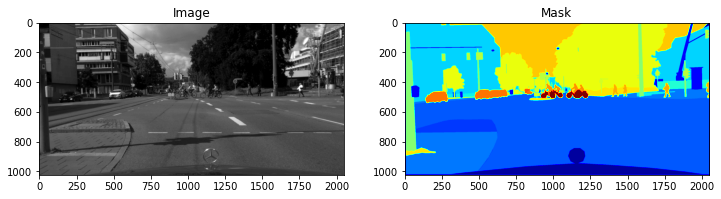

In [ ]:
import random
img_num = random.randint(0, num_images-1)

img_for_plot = cv2.imread(train_img_dir  + img_list[img_num], 0)
mask_for_plot =cv2.imread(train_mask_dir + mask_list[img_num], 0)

plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(img_for_plot, cmap='gray')
plt.title('Image')
plt.subplot(122)
plt.imshow(mask_for_plot, cmap='jet')
plt.title('Mask')
plt.show()

In [ ]:
print("Unique values in the mask are: ", np.unique(mask_for_plot))

Unique values in the mask are:  [ 0  1  3  4  6  7  8 11 12 13 17 19 20 21 22 23 24 25 26 27 33]


In [ ]:
#Sample code to encode this single image. We will include this as part of our data gen. 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
h, w = mask_for_plot.shape  
mask_for_plot_reshaped = mask_for_plot.reshape(-1,1)
mask_for_plot_reshaped_encoded = labelencoder.fit_transform(mask_for_plot_reshaped)
mask_for_plot_encoded = mask_for_plot_reshaped_encoded.reshape(h, w)
print("Unique values in the mask after endcoding are: ", np.unique(mask_for_plot_encoded))

Unique values in the mask after endcoding are:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:

seed=24
batch_size= 32
num_class = 35

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
#Define a function to perform additional preprocessing after datagen.
#For example, scale images, convert masks to categorical, etc. 
def preprocess_data(img, mask, num_class):
    #Scale images
    img = img / 255. #This can be done in ImageDataGenerator but showing it outside as an example
    #Convert mask to one-hot
    labelencoder = LabelEncoder()
    n, h, w, c = mask.shape  
    mask = mask.reshape(-1,1)
    mask = labelencoder.fit_transform(mask)
    mask = mask.reshape(n, h, w, c)
    mask = to_categorical(mask, num_class)
      
    return (img, mask)

#Define the generator.
#We are not doing any rotation or zoom to make sure mask values are not interpolated.
#It is important to keep pixel values in mask as 0, 1, 2, 3, .....
from tensorflow.keras.preprocessing.image import ImageDataGenerator
def trainGenerator(train_img_path, train_mask_path, num_class):
    
    img_data_gen_args = dict( horizontal_flip=True,
                              vertical_flip=True,
                              fill_mode='reflect'
                              )

    '''
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='reflect'
    '''
    image_datagen = ImageDataGenerator(**img_data_gen_args)
    mask_datagen  = ImageDataGenerator(**img_data_gen_args)
    
    image_generator = image_datagen.flow_from_directory(
        train_img_path,
        class_mode = None,
        color_mode = 'grayscale',
        target_size=(128,128),
        batch_size = batch_size,
        seed = seed)
    
    mask_generator = mask_datagen.flow_from_directory(
        train_mask_path,
        class_mode = None,
        color_mode = 'grayscale',
        target_size=(128,128),
        batch_size = batch_size,
        seed = seed)
    
    train_generator = zip(image_generator, mask_generator)
    
    for (img, mask) in train_generator:
        img, mask = preprocess_data(img, mask, num_class)
        yield (img, mask)


In [ ]:
train_img_path = "/content/dataset_aug_format/train_images/"
train_mask_path = "/content/dataset_aug_format/train_masks/"
train_img_gen = trainGenerator(train_img_path, train_mask_path, num_class=num_class)

val_img_path = "/content/dataset_aug_format/val_images/"
val_mask_path = "/content/dataset_aug_format/val_masks"
val_img_gen = trainGenerator(val_img_path, val_mask_path, num_class = num_class)

In [ ]:
x, y = train_img_gen.__next__()

Found 2975 images belonging to 1 classes.
Found 2975 images belonging to 1 classes.


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(x.shape)
print(y.shape)
print("max value in image dataset is: ", x.max())

(32, 128, 128, 1)
(32, 128, 128, 35)
max value in image dataset is:  1.0


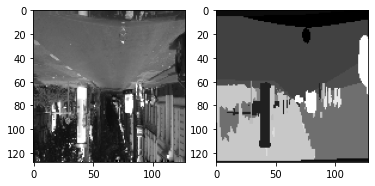

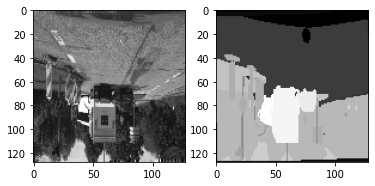

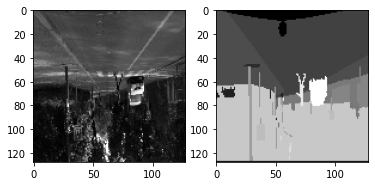

In [ ]:
for i in range(0,3):
    image = x[i,:,:,0]
    mask = np.argmax(y[i], axis=2)
    plt.subplot(1,2,1)
    plt.imshow(image, cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(mask, cmap='gray')
    plt.show()

In [ ]:
num_train_imgs = len(os.listdir('/content/dataset_aug_format/train_images/images'))
num_val_images = len(os.listdir('/content/dataset_aug_format/val_images/images'))
steps_per_epoch = num_train_imgs//batch_size
val_steps_per_epoch = num_val_images//batch_size

IMG_HEIGHT = x.shape[1]
IMG_WIDTH  = x.shape[2]
IMG_CHANNELS = x.shape[3]
input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
n_classes= num_class

In [ ]:
#Add Callbacks, e.g. ModelCheckpoints, earlystopping, csvlogger.
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

#ModelCheckpoint callback saves a model at some interval. 
model_saves = '/content/saved_models'
os.makedirs(model_saves, exist_ok = True)

#Give unique name to save all models as accuracy improves
filepath="/content/saved_models/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5" #File name includes epoch and validation accuracy.

#Overwrite the model each time accuracy improves. Saves a lot of space. 
#filepath="/content/drive/MyDrive/Colab Notebooks/saved_models/best_model.hdf5" #File name includes epoch and validation accuracy.
#Use Mode = max for accuracy and min for loss. 
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
#This callback will stop the training when there is no improvement in
# the validation loss for three consecutive epochs.

#CSVLogger logs epoch, accuracy, loss, val_accuracy, val_loss. So we can plot later.
log_csv = CSVLogger('/content/saved_models/my_logs.csv', separator=',', append=False)

callbacks_list = [checkpoint]

In [ ]:
model = danet_resnet101(height=IMG_HEIGHT, width=IMG_WIDTH, channel = IMG_CHANNELS, classes=num_class)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

In [ ]:
history = model.fit(train_img_gen,
          steps_per_epoch=steps_per_epoch,
          epochs=20,
          verbose=1,
          validation_data=val_img_gen,
          validation_steps=val_steps_per_epoch)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


92/92 [==============================] - ETA: 0s - loss: 2.6590 - accuracy: 0.3888Found 500 images belonging to 1 classes.
Found 500 images belonging to 1 classes.
92/92 [==============================] - 421s 4s/step - loss: 2.6590 - accuracy: 0.3888 - val_loss: 283.2592 - val_accuracy: 0.0541
Epoch 2/20
92/92 [==============================] - 426s 5s/step - loss: 2.1842 - accuracy: 0.4966 - val_loss: 2.6002 - val_accuracy: 0.3978
Epoch 3/20
92/92 [==============================] - 428s 5s/step - loss: 2.0311 - accuracy: 0.5277 - val_loss: 2.4178 - val_accuracy: 0.4457
Epoch 4/20
92/92 [==============================] - 424s 5s/step - loss: 1.9047 - accuracy: 0.5460 - val_loss: 2.3115 - val_accuracy: 0.4558
Epoch 5/20
92/92 [==============================] - 397s 4s/step - loss: 1.7691 - accuracy: 0.5467 - val_loss: 2.2505 - val_accuracy: 0.4791
Epoch 6/20
92/92 [==============================] - 423s 5s/step - loss: 1.6850 - accuracy: 0.5793 - val_loss: 1.9990 - val_accuracy: 0.4956

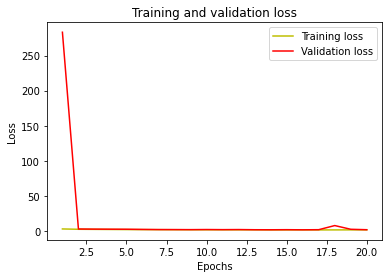

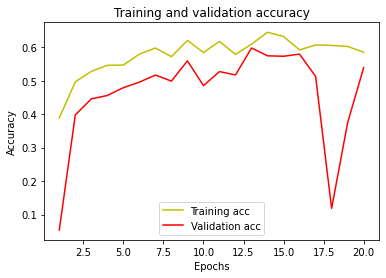

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_image_batch, test_mask_batch = val_img_gen.__next__()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred=model.predict(test_image_batch)
y_pred_argmax=np.argmax(y_pred, axis=3)
y_argmax = np.argmax(test_mask_batch, axis=3)

In [ ]:
#Using built in keras function
from keras.metrics import MeanIoU
n_classes = num_class
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_argmax, y_pred_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.11173845


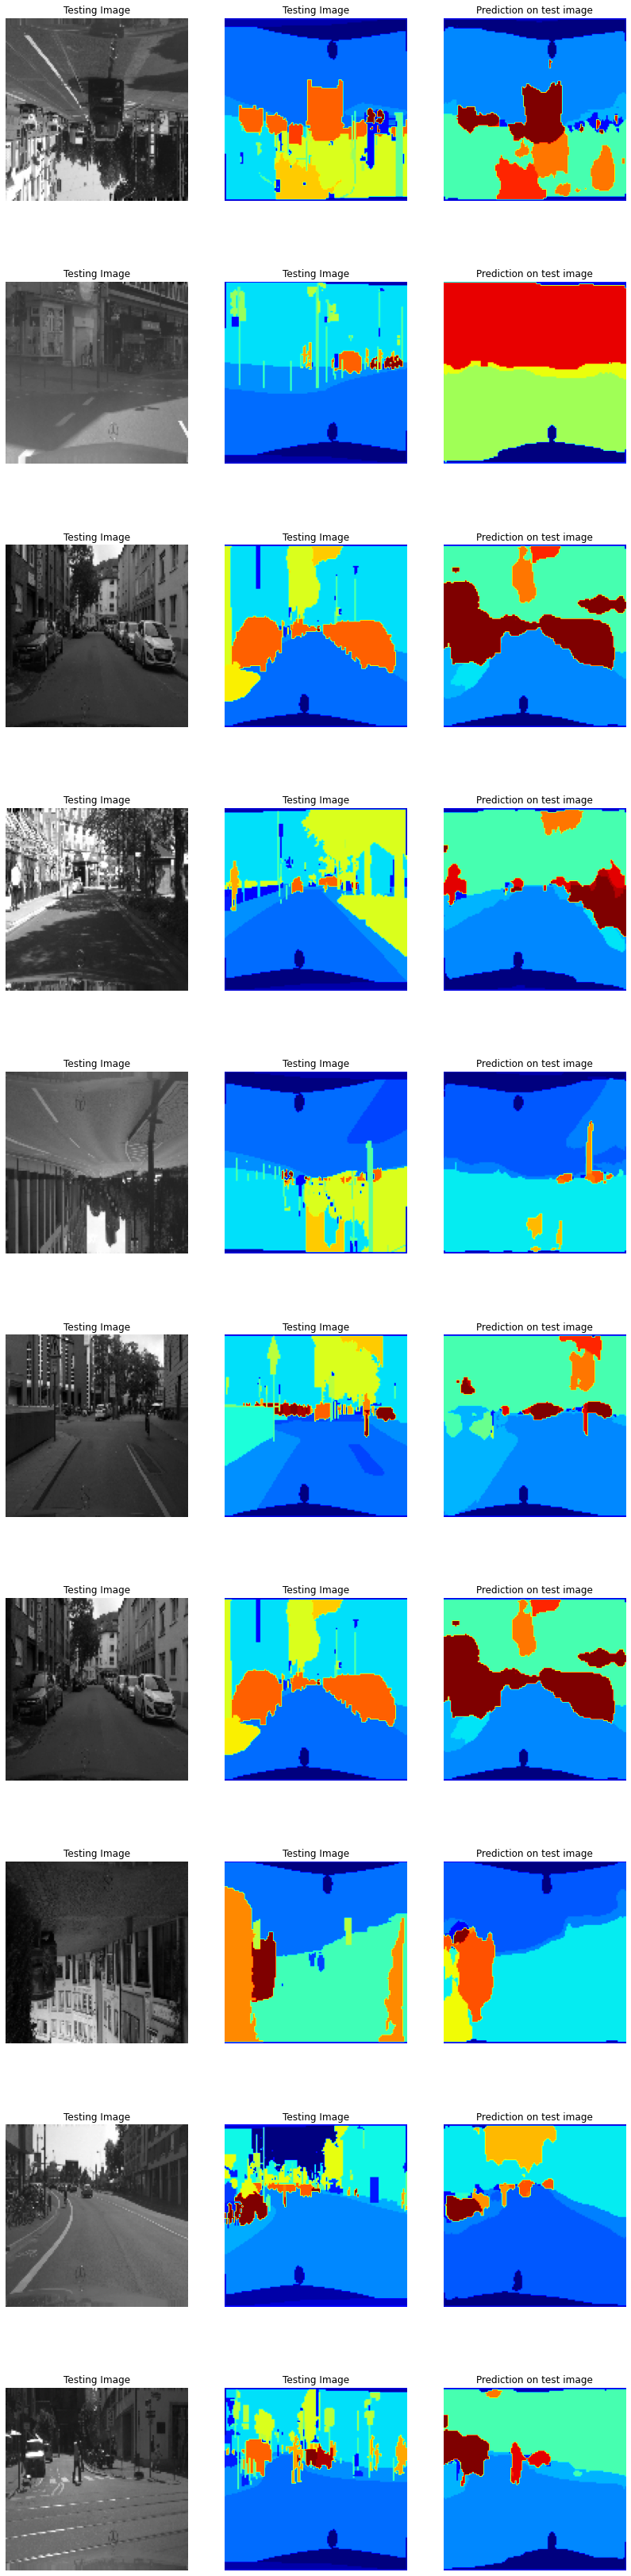

In [ ]:
#Predict on a few images
#model = get_model()
#model.load_weights('???.hdf5')  
num_images = 10

import random
test_img_numbers = np.random.randint(0, len(test_image_batch)-1, num_images)
test_imgs     = [test_image_batch[test_img_number] for test_img_number in test_img_numbers]
ground_truths = [test_mask_batch[test_img_number]  for test_img_number in test_img_numbers]
ground_truths = [np.argmax(ground_truth, axis=2) for ground_truth in ground_truths]

test_img_norms= [test_img[:,:,0][:,:,None] for test_img in test_imgs]

test_img_inputs=[np.expand_dims(test_img_norm, 0) for test_img_norm in test_img_norms]

predictions = [(model.predict(test_img_input)) for test_img_input in test_img_inputs]
predicted_imgs =[np.argmax(prediction, axis=3)[0,:,:] for prediction in predictions]

nrows = num_images
ncols = 3

fig, ax = plt.subplots(nrows = nrows , ncols = ncols ,figsize=(14 ,60))

for i in range(nrows):
  ax[i][0].imshow(test_imgs[i][:,:,0], cmap= 'gray')
  ax[i][0].axis('off')
  ax[i][0].set_title('Testing Image')

  ax[i][1].imshow(ground_truths[i], cmap='jet')
  ax[i][1].axis('off')
  ax[i][1].set_title('Testing Image')

  ax[i][2].imshow(predicted_imgs[i], cmap='jet')
  ax[i][2].axis('off')
  ax[i][2].set_title('Prediction on test image')